In [40]:
import pandas as pd
import altair as alt
import warnings
import string

warnings.filterwarnings('ignore')
f = open("pride.txt")

In [63]:
common_words_file = open("words5000.csv")
common_words = []
lines = common_words_file.readlines()
common_words_file.close()
for line in lines[1:101]:
    word = line.split(",")[1]
    common_words.append(word)
print(common_words[:10])

['the', 'be', 'and', 'of', 'a', 'in', 'to', 'have', 'to', 'it']


In [41]:
chapter = 0
word_chapters = []

for line in f:
    words = line.split()
    if not words:
        continue
    if words[0] == "Chapter":
        chapter = int(words[1])
        word_chapters.append({})
    elif chapter > 0:
        for w in words:
            w = w.lower().strip(string.punctuation).strip("““")
            if w not in word_chapters[-1]:
                word_chapters[-1][w] = 0
            word_chapters[-1][w] += 1

In [83]:
word_tuples = []
for i in range(len(word_chapters)):
    word_count_dict = word_chapters[i]
    for word in word_count_dict:
        if word not in common_words and word not in ["i", "was", "had", "is", "were", "been", "are", "mr", "has", "did", "an"]: 
            count = word_count_dict[word]
            word_tuples.append((i+1, word, count))

What's the most common word in each Chapter?


In [85]:
df = pd.DataFrame(word_tuples, columns=["chapter", "word", "count"])
df.sort_values("count", ascending=False).drop_duplicates('chapter')

,chapter,word,count
22788,43,elizabeth,36
8445,18,darcy,30
7094,16,very,28
25975,47,such,23
24548,45,miss,22
14954,29,lady,21
30161,53,said,20
3006,8,bingley,20
32111,56,elizabeth,19
4089,10,darcy,18


Find the 10 most common words overall and plot their frequency over the course of the book

In [89]:
top_ten = df.groupby(["word"]).sum().sort_values("count", ascending=False)[:10].index

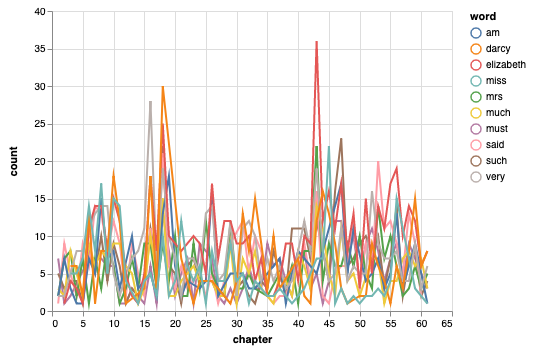

In [92]:
df_top_ten = df[df.word.isin(top_ten)]
alt.Chart(df_top_ten).mark_line().encode(x="chapter", y="count", color="word")